In [7]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


In [8]:
import praw
from collections import Counter

reddit = praw.Reddit(
    client_id='',
    client_secret='',
    user_agent=''

)

print(reddit.read_only)  # prints True if it works


True


In [12]:
# Specify the subreddit
subreddit = reddit.subreddit('CFB')

# Fetch and display top posts related to OU
for submission in subreddit.search('Sooners' and 'Playoffs', sort='new', limit=5):
    print(f'Title: {submission.title}, Score: {submission.score}, URL: {submission.url}')

Title: Trivia Tuesday, Score: 24, URL: https://www.reddit.com/r/CFB/comments/1ftq719/trivia_tuesday/
Title: Who are the Top Group of Five CFP Contenders?, Score: 43, URL: https://twsn.net/2024/09/top-group-of-five-college-football-playoff-contenders
Title: College Football Bowl Projections: Brett McMurphy's Week 6 Bowl Predictions, College Football Playoff Picks, Score: 14, URL: https://www.actionnetwork.com/ncaaf/college-football-bowl-projections-week-6-brett-mcmurphy-predictions-college-football-playoff-picks?utm_source=Twitter&utm_medium=Social&utm_campaign=BrettMcMurphy
Title: TANK JOB OF THE WEEK: WEEK FIVE, Score: 267, URL: https://www.reddit.com/r/CFB/comments/1fsy1w9/tank_job_of_the_week_week_five/
Title: The Monday Morning Playoff Committee, Score: 9, URL: https://www.reddit.com/r/CFB/comments/1fsxmcy/the_monday_morning_playoff_committee/


In [9]:
# Connect to the CFB subreddit
subreddit = reddit.subreddit("CFB")

# Define search parameters
search_terms = ["playoff", "CFP", "12 team playoff", "prediction"]

# Store results
team_mentions = Counter()

# Get the top 10 posts from the subreddit
for post in subreddit.search(" OR ".join(search_terms), sort='new', limit=10):
    # Check for posts with specific flairs, like "Playoff Predictions"
    if "playoff" in post.link_flair_text.lower():
        print(f"Title: {post.title}")
        
        # Analyze post content for mentions of teams
        post_text = post.title + " " + post.selftext
        
        # Check for mentions of specific teams (adjust team list as needed)
       # teams = ["OU", "Oklahoma", "Alabama", "Georgia", "Michigan", "Ohio State"]
        teams = [
    "OU", "Oklahoma", "Alabama", "Bama", "UA", "Georgia", "UGA", 
    "Michigan", "UM", "Wolverines", "Ohio State", "OSU", "Buckeyes",
    "Clemson", "Tigers", "LSU", "Louisiana State", "Notre Dame", "ND", 
    "Irish", "USC", "Southern Cal", "Trojans", "Texas", "UT", "Longhorns", 
    "Penn State", "PSU", "Nittany Lions", "Florida State", "FSU", "Seminoles", 
    "Oregon", "Ducks", "Washington", "Huskies", "Tennessee", "Vols", "Utah", 
    "Utes", "TCU", "Texas Christian", "Miami", "Hurricanes", "The U", "Wisconsin", 
    "Badgers", "Texas A&M", "Aggies", "TAMU", "Auburn", "Tigers", "War Eagles", 
    "Oklahoma State", "OSU", "Cowboys", "North Carolina", "UNC", "Tar Heels", 
    "Kentucky", "Wildcats", "Ole Miss", "Mississippi", "Rebels", "Arkansas", 
    "Razorbacks", "Iowa", "Hawkeyes", "Baylor", "Bears", "Minnesota", "Gophers", 
    "UCLA", "Bruins", "Mississippi State", "MSU", "Bulldogs", "Kansas State", 
    "K-State", "Wildcats", "Florida", "Gators", "UCF", "Central Florida", 
    "Knights", "Louisville", "Cardinals", "South Carolina", "Gamecocks", 
    "Michigan State", "MSU", "Spartans", "Nebraska", "Cornhuskers", "Pittsburgh", 
    "Pitt", "Panthers", "Syracuse", "Orange", "Missouri", "Tigers", "BYU", "Cougars", 
    "Boise State", "Broncos", "Indiana", "Hoosiers", "Illinois", "Fighting Illini", 
    "UNLV", "Rebels"
]

        for team in teams:
            if team.lower() in post_text.lower():
                team_mentions[team] += 1

        # Also scrape comments for team mentions
        post.comments.replace_more(limit=0)
        for comment in post.comments.list():
            comment_body = comment.body.lower()
            for team in teams:
                if team.lower() in comment_body:
                    team_mentions[team] += 1

# Display the results
print("\nTeam Mentions in Playoff Posts:")
for team, count in team_mentions.most_common():
    print(f"{team}: {count} mentions")


Team Mentions in Playoff Posts:


In [15]:
# Connect to the CFB subreddit
subreddit = reddit.subreddit("CFB")

# Search for the specific post title
target_post_title = "What is your 12 Team Playoff Prediction?"

# List of teams to search for
teams = [
    "OU", "Oklahoma", "Alabama", "Bama", "UA", "Georgia", "UGA", 
    "Michigan", "UM", "Wolverines", "Ohio State", "OSU", "Buckeyes",
    "Clemson", "Tigers", "LSU", "Louisiana State", "Notre Dame", "ND", 
    "Irish", "USC", "Southern Cal", "Trojans", "Texas", "UT", "Longhorns", 
    "Penn State", "PSU", "Nittany Lions", "Florida State", "FSU", "Seminoles", 
    "Oregon", "Ducks", "Washington", "Huskies", "Tennessee", "Vols", "Utah", 
    "Utes", "TCU", "Texas Christian", "Miami", "Hurricanes", "The U", "Wisconsin", 
    "Badgers", "Texas A&M", "Aggies", "TAMU", "Auburn", "Tigers", "War Eagles", 
    "Oklahoma State", "OSU", "Cowboys", "North Carolina", "UNC", "Tar Heels", 
    "Kentucky", "Wildcats", "Ole Miss", "Mississippi", "Rebels", "Arkansas", 
    "Razorbacks", "Iowa", "Hawkeyes", "Baylor", "Bears", "Minnesota", "Gophers", 
    "UCLA", "Bruins", "Mississippi State", "MSU", "Bulldogs", "Kansas State", 
    "K-State", "Wildcats", "Florida", "Gators", "UCF", "Central Florida", 
    "Knights", "Louisville", "Cardinals", "South Carolina", "Gamecocks", 
    "Michigan State", "MSU", "Spartans", "Nebraska", "Cornhuskers", "Pittsburgh", 
    "Pitt", "Panthers", "Syracuse", "Orange", "Missouri", "Tigers", "BYU", "Cougars", 
    "Boise State", "Broncos", "Indiana", "Hoosiers", "Illinois", "Fighting Illini", 
    "UNLV", "Rebels"
]

# Search the subreddit for this specific post (using exact match)
for post in subreddit.search(target_post_title, sort='hot', limit=100000):
    # Check if the title matches exactly
    if post.title.lower() == target_post_title.lower():
        print(f"Found the post: {post.title}\n")
        
        # Analyze post content for mentions of teams
        post_text = post.title + " " + post.selftext
        
        # Store results
        team_mentions = {}
        
        # Count team mentions in the post body
        for team in teams:
            if team.lower() in post_text.lower():
                team_mentions[team] = team_mentions.get(team, 0) + 1
        
        # Also scrape comments for team mentions
        post.comments.replace_more(limit=0)
        for comment in post.comments.list():
            comment_body = comment.body.lower()
            for team in teams:
                if team.lower() in comment_body:
                    team_mentions[team] = team_mentions.get(team, 0) + 1

        # Display the results
        print("Team Mentions in Post and Comments:")
        for team, count in team_mentions.items():
            print(f"{team}: {count} mentions")

        # Break after finding the first matching post (to avoid duplicates)
        break

In [27]:
# Connect to the CFB subreddit
subreddit = reddit.subreddit("CFB")

# Search for posts containing both "playoff" and "prediction" in the title
keywords = ["playoff", "prediction"]

found_post = False
for post in subreddit.hot(limit=10000000):  # Adjust the limit as needed
    # Check if both keywords are in the title
    if all(keyword in post.title.lower() for keyword in keywords):
        print(f"Found the post: {post.title} - URL: {post.url}\n")
        found_post = True
    
        break  # Stop searching after finding the first matching post

if not found_post:
    print("No matching posts found in the last 1000 posts.")

Found the post: College Football Bowl Projections: Brett McMurphy's Week 6 Bowl Predictions, College Football Playoff Picks - URL: https://www.actionnetwork.com/ncaaf/college-football-bowl-projections-week-6-brett-mcmurphy-predictions-college-football-playoff-picks?utm_source=Twitter&utm_medium=Social&utm_campaign=BrettMcMurphy



In [28]:
# Connect to the CFB subreddit
subreddit = reddit.subreddit("CFB")

# Keywords for broader search
keywords = ["12 Team", "Playoff"]
found_post = False

# Check top posts first
for post in subreddit.top(limit=None):  # Remove limit to get all top posts
    if any(keyword.lower() in post.title.lower() for keyword in keywords):
        print(f"Found a relevant post in top posts: {post.title} - URL: {post.url}\n")
        found_post = True
        break

# If no relevant post is found, check the newest ones
if not found_post:
    for post in subreddit.new(limit=None):  # Remove limit to get all new posts
        if any(keyword.lower() in post.title.lower() for keyword in keywords):
            print(f"Found a relevant post in new posts: {post.title} - URL: {post.url}\n")
            found_post = True
            break

if not found_post:
    print("No matching posts found in top or new posts.")

Found a relevant post in top posts: For the first time, neither Alabama or Clemson will be in the College Football Playoff - URL: https://www.reddit.com/r/CFB/comments/zcftzu/for_the_first_time_neither_alabama_or_clemson/



In [34]:
import time
# Connect to the CFB subreddit
subreddit = reddit.subreddit("CFB")

# Define the time frame (4 months ago)
four_months_ago_timestamp = time.time() - (60 * 60 * 24 * 120)  # 120 days ago

# Keywords for broader search
keywords = ["12 Team", "Playoff", "Prediction"]
found_post = False

# Check top posts first
for post in subreddit.hot(limit=None):  # Get all top posts
    if post.created_utc >= four_months_ago_timestamp:  # Check the timestamp
        if all(keyword.lower() in post.title.lower() for keyword in keywords):
            print(f"Found a relevant post in top posts: {post.title} - URL: {post.url}\n")
            found_post = True
            break

# If no relevant post is found, check the newest ones
if not found_post:
    for post in subreddit.new(limit=None):  # Get all new posts
        if post.created_utc >= four_months_ago_timestamp:  # Check the timestamp
            if all(keyword.lower() in post.title.lower() for keyword in keywords):
                print(f"Found a relevant post in new posts: {post.title} - URL: {post.url}\n")
                found_post = True
                break

if not found_post:
    print("No matching posts found in the last 4 months in top or new posts.")


No matching posts found in the last 4 months in top or new posts.


In [35]:
submission = reddit.submission(url="https://www.reddit.com/r/CFB/comments/1ef9f5t/what_is_your_12_team_playoff_prediction/?sort=new")

# Print the title of the post
print(submission.title)

for top_level_comment in submission.comments:
    print(top_level_comment.body)

What is your 12 Team Playoff Prediction?
I don’t get the Miami love. Until they do something they are not back. They are just the ACC Version of Texas A&M. Hyped a bunch only to revert back to 8-4.
1. LA Tech
2. LA Monroe
3. Southern Miss
4. UAB
5. Alabama State
6. Air Force
7. Vandy
8. Ball State
9. Baylor
10. Old Dominion
11. Coastal Carolina
12. BYU
SEC is not getting in 5 when they all play each other.
12 teams will be selected.
All this kansas hype is going to bite us. We had one winning season yall 
Kansas? Big 12 champs? Is that a typo and you forgot the “state” part?what world is this.🤯
Tried doing this in predicting the games, records prolly aren't this but a close guess IMO.

1 Texas 12-1 (SEC Champs)

2 Ohio St 12-1 (B1G Champs)

3 Kansas 11-2 (XII Champs)

4 NC St 11-2 (ACC Champs)

5 Oregon 12-1 

6 Georgia 11-1

7 Ole Miss 11-1

8 Mizzou 11-2

9 SMU 12-1 

10 Notre Dame 11-1 

11 Utah 11-2

12 Liberty 12-1 (G5 Champ) 

Next 4 out: Bama, FSU, OU, Arizona
I’d like to see at

In [36]:
#######GREATLIST
# Connect to the specific submission
submission = reddit.submission(url="https://www.reddit.com/r/CFB/comments/1ef9f5t/what_is_your_12_team_playoff_prediction/?sort=new")

# Print the title of the post
print(f"Post Title: {submission.title}\n")

# Ensure all comments are loaded
submission.comments.replace_more(limit=None)  # Replace 'limit' with None to get all comments

# Define the list of teams you're interested in
teams = [
    "OU", "Oklahoma","Sooners", "Alabama", "Bama","Tide", "Rolltide", "UA", "Georgia", "UGA","Dawgs",
    "Michigan", "UM", "Wolverines", "Ohio State", "OSU", "Buckeyes",
    "Clemson", "Tigers", "LSU", "Louisiana State","Louisiana", "Notre Dame", "ND",
    "Irish", "USC", "Southern Cal","Southern California", "SoCal", "Trojans", "Texas", "UT", "Longhorns",
    "Penn State", "PSU", "Nittany Lions", "Florida State", "FSU", "Seminoles",
    "Oregon", "Ducks", "Washington", "Huskies", "Tennessee","Volunteers", "Vols", "Utah",
    "Utes", "TCU", "Texas Christian", "Miami", "Hurricanes", "The U", "Wisconsin",
    "Badgers", "Texas A&M", "Aggies", "TAMU", "Auburn", "Tigers", "War Eagles",
    "Oklahoma State", "OSU", "Cowboys", "North Carolina", "UNC", "Tar Heels",
    "Kentucky", "Wildcats", "Ole Miss", "Mississippi", "Rebels", "Arkansas",
    "Razorbacks", "Iowa", "Hawkeyes", "Baylor", "Bears", "Minnesota", "Gophers",
    "UCLA", "Bruins", "Mississippi State", "MSU", "Bulldogs", "Kansas State",
    "K-State", "Wildcats", "Florida", "Gators", "UCF", "Central Florida",
    "Knights", "Louisville", "Cardinals", "South Carolina", "Gamecocks",
    "Michigan State", "MSU", "Spartans", "Nebraska", "Cornhuskers", "Pittsburgh",
    "Pitt", "Panthers", "Syracuse", "Orange", "Missouri","Mizzou", "Tigers", "BYU", "Cougars",
    "Boise State", "Broncos", "Indiana", "Hoosiers","IU", "Illinois", "Fighting Illini",
    "UNLV","Las Vegas" ,"Rebels", "Iowa State", "Cyclones", "ISU", "Utah", "Utes"
]

# Create a Counter for team mentions
team_mentions = Counter()

# Loop through each comment and count mentions of teams
for comment in submission.comments.list():  # Use .list() to flatten the comment tree
    comment_body = comment.body.lower()  # Convert to lower case for case sensitive matching
    for team in teams:
        if team.lower() in comment_body:
            team_mentions[team] += 1

# Print the results
print("Team Mentions Count:")
for team, count in team_mentions.most_common():
    print(f"{team}: {count} mentions")

Post Title: What is your 12 Team Playoff Prediction?

Team Mentions Count:
OU: 72 mentions
ND: 68 mentions
UT: 54 mentions
Bama: 22 mentions
Texas: 19 mentions
Georgia: 17 mentions
Oregon: 17 mentions
Notre Dame: 15 mentions
Utah: 14 mentions
Alabama: 13 mentions
UA: 13 mentions
Ole Miss: 13 mentions
LSU: 13 mentions
Ohio State: 11 mentions
UM: 10 mentions
Miami: 8 mentions
FSU: 8 mentions
Penn State: 8 mentions
Florida: 8 mentions
OSU: 6 mentions
Florida State: 6 mentions
Tennessee: 6 mentions
Clemson: 6 mentions
Boise State: 5 mentions
PSU: 5 mentions
Oklahoma: 5 mentions
UGA: 5 mentions
Michigan: 4 mentions
Oklahoma State: 4 mentions
Nebraska: 3 mentions
Kansas State: 3 mentions
Missouri: 3 mentions
Baylor: 2 mentions
UNLV: 2 mentions
UCF: 2 mentions
Wisconsin: 2 mentions
Texas A&M: 1 mentions
UNC: 1 mentions
BYU: 1 mentions
Hurricanes: 1 mentions
Kentucky: 1 mentions
Louisville: 1 mentions
Iowa: 1 mentions
TCU: 1 mentions
K-State: 1 mentions
The U: 1 mentions


In [37]:
# Connect to the specific submission
submission = reddit.submission(url="https://www.reddit.com/r/CFB/comments/1ef9f5t/what_is_your_12_team_playoff_prediction/?sort=new")

# Print the title of the post
print(f"Post Title: {submission.title}\n")

# Ensure all comments are loaded
submission.comments.replace_more(limit=None)  # Replace 'limit' with None to get all comments

# Define the list of teams you're interested in
teams = [
    "OU", "Oklahoma","Sooners", "Alabama", "Bama","Tide", "Rolltide", "UA", "Georgia", "UGA","Dawgs",
    "Michigan", "UM", "Wolverines", "Ohio State", "OSU", "Buckeyes",
    "Clemson", "Tigers", "LSU", "Louisiana State","Louisiana", "Notre Dame", "ND",
    "Irish", "USC", "Southern Cal","Southern California", "SoCal", "Trojans", "Texas", "UT", "Longhorns",
    "Penn State", "PSU", "Nittany Lions", "Florida State", "FSU", "Seminoles",
    "Oregon", "Ducks", "Washington", "Huskies", "Tennessee","Volunteers", "Vols", "Utah",
    "Utes", "TCU", "Texas Christian", "Miami", "Hurricanes", "The U", "Wisconsin",
    "Badgers", "Texas A&M", "Aggies", "TAMU", "Auburn", "Tigers", "War Eagles",
    "Oklahoma State", "OSU", "Cowboys", "North Carolina", "UNC", "Tar Heels",
    "Kentucky", "Wildcats", "Ole Miss", "Mississippi", "Rebels", "Arkansas",
    "Razorbacks", "Iowa", "Hawkeyes", "Baylor", "Bears", "Minnesota", "Gophers",
    "UCLA", "Bruins", "Mississippi State", "MSU", "Bulldogs", "Kansas State",
    "K-State", "Wildcats", "Florida", "Gators", "UCF", "Central Florida",
    "Knights", "Louisville", "Cardinals", "South Carolina", "Gamecocks",
    "Michigan State", "MSU", "Spartans", "Nebraska", "Cornhuskers", "Pittsburgh",
    "Pitt", "Panthers", "Syracuse", "Orange", "Missouri","Mizzou", "Tigers", "BYU", "Cougars",
    "Boise State", "Broncos", "Indiana", "Hoosiers","IU", "Illinois", "Fighting Illini",
    "UNLV","Las Vegas" ,"Rebels", "Iowa State", "Cyclones", "ISU", "Utah", "Utes"
]

# Create a dictionary for team mentions
team_mentions_dict = {team: 0 for team in teams}  # Initialize counts to 0 for each team

# Loop through each comment and count mentions of teams
for comment in submission.comments.list():  # Use .list() to flatten the comment tree
    comment_body = comment.body.lower()  # Convert to lower case for case-insensitive matching
    for team in teams:
        if team.lower() in comment_body:
            team_mentions_dict[team] += 1

# Print the results as a dictionary
print("Team Mentions Count:")
print(team_mentions_dict)

Post Title: What is your 12 Team Playoff Prediction?

Team Mentions Count:
{'OU': 72, 'Oklahoma': 5, 'Sooners': 0, 'Alabama': 13, 'Bama': 22, 'Tide': 0, 'Rolltide': 0, 'UA': 13, 'Georgia': 17, 'UGA': 5, 'Dawgs': 0, 'Michigan': 4, 'UM': 10, 'Wolverines': 0, 'Ohio State': 11, 'OSU': 6, 'Buckeyes': 0, 'Clemson': 6, 'Tigers': 0, 'LSU': 13, 'Louisiana State': 0, 'Louisiana': 0, 'Notre Dame': 15, 'ND': 68, 'Irish': 0, 'USC': 0, 'Southern Cal': 0, 'Southern California': 0, 'SoCal': 0, 'Trojans': 0, 'Texas': 19, 'UT': 54, 'Longhorns': 0, 'Penn State': 8, 'PSU': 5, 'Nittany Lions': 0, 'Florida State': 6, 'FSU': 8, 'Seminoles': 0, 'Oregon': 17, 'Ducks': 0, 'Washington': 0, 'Huskies': 0, 'Tennessee': 6, 'Volunteers': 0, 'Vols': 0, 'Utah': 28, 'Utes': 0, 'TCU': 1, 'Texas Christian': 0, 'Miami': 8, 'Hurricanes': 1, 'The U': 1, 'Wisconsin': 2, 'Badgers': 0, 'Texas A&M': 1, 'Aggies': 0, 'TAMU': 0, 'Auburn': 0, 'War Eagles': 0, 'Oklahoma State': 4, 'Cowboys': 0, 'North Carolina': 0, 'UNC': 1, 'Tar Hee

In [39]:
# Connect to the specific submission
submission = reddit.submission(url="https://www.reddit.com/r/CFB/comments/1ef9f5t/what_is_your_12_team_playoff_prediction/?sort=new")

# Print the title of the post
print(f"Post Title: {submission.title}\n")

# Ensure all comments are loaded
submission.comments.replace_more(limit=None)  # Replace 'limit' with None to get all comments

# Define the list of teams with their aliases
teams = {
    "OU": ["Oklahoma", "Sooners", "OU"],
    "Alabama": ["Bama", "Tide", "Rolltide", "UA", "Alabama"],
    "Georgia": ["UGA", "Dawgs", "Georgia"],
    "Michigan": ["UM", "Wolverines", "Michigan"],
    "Ohio State": ["OSU", "Buckeyes", "Ohio State"],
    "Clemson": ["Tigers", "Clemson"],
    "LSU": ["Louisiana State", "Louisiana", "LSU"],
    "Notre Dame": ["ND", "Irish", "Notre Dame"],
    "USC": ["Southern Cal", "Southern California", "SoCal", "Trojans", "USC"],
    "Texas": ["UT", "Longhorns", "Texas"],
    "Penn State": ["PSU", "Nittany Lions", "Penn State"],
    "Florida State": ["FSU", "Seminoles", "Florida State"],
    "Oregon": ["Ducks", "Oregon"],
    "Washington": ["Huskies", "Washington"],
    "Tennessee": ["Volunteers", "Vols", "Tennessee"],
    "Utah": ["Utes", "Utah"],
    "TCU": ["Texas Christian", "TCU"],
    "Miami": ["Hurricanes", "The U", "Miami"],
    "Wisconsin": ["Badgers", "Wisconsin"],
    "Texas A&M": ["Aggies", "TAMU", "Texas A&M"],
    "Auburn": ["Tigers", "War Eagles", "Auburn"],
    "Oklahoma State": ["OSU", "Cowboys", "Oklahoma State"],
    "North Carolina": ["UNC", "Tar Heels", "North Carolina"],
    "Kentucky": ["Wildcats", "Kentucky"],
    "Ole Miss": ["Mississippi", "Rebels", "Ole Miss"],
    "Arkansas": ["Razorbacks", "Arkansas"],
    "Iowa": ["Hawkeyes", "Iowa"],
    "Baylor": ["Bears", "Baylor"],
    "Minnesota": ["Gophers", "Minnesota"],
    "UCLA": ["Bruins", "UCLA"],
    "Mississippi State": ["MSU", "Bulldogs", "Mississippi State"],
    "Kansas State": ["K-State", "Wildcats", "Kansas State"],
    "Florida": ["Gators", "Florida"],
    "UCF": ["Central Florida", "Knights", "UCF"],
    "Louisville": ["Cardinals", "Louisville"],
    "South Carolina": ["Gamecocks", "South Carolina"],
    "Michigan State": ["MSU", "Spartans", "Michigan State"],
    "Nebraska": ["Cornhuskers", "Nebraska"],
    "Pittsburgh": ["Pitt", "Panthers", "Pittsburgh"],
    "Syracuse": ["Orange", "Syracuse"],
    "Missouri": ["Mizzou", "Tigers", "Missouri"],
    "BYU": ["Cougars", "BYU"],
    "Boise State": ["Broncos", "Boise State"],
    "Indiana": ["Hoosiers", "IU", "Indiana"],
    "Illinois": ["Fighting Illini", "Illinois"],
    "UNLV": ["Las Vegas", "Rebels", "UNLV"],
    "Iowa State": ["Cyclones", "ISU", "Iowa State"],
}

# Create a dictionary for team mentions
team_mentions_dict = {team: 0 for team in teams}  # Initialize counts to 0 for each main team

# Loop through each comment and count mentions of teams and their aliases
for comment in submission.comments.list():  # Use .list() to flatten the comment tree
    comment_body = comment.body.lower()  # Convert to lower case for case-insensitive matching
    for team, aliases in teams.items():
        if any(alias.lower() in comment_body for alias in aliases):  # Check if any alias is in the comment
            team_mentions_dict[team] += 1

# Print the results as a dictionary
print("Team Mentions Count:")
print(team_mentions_dict)

Post Title: What is your 12 Team Playoff Prediction?

Team Mentions Count:
{'OU': 75, 'Alabama': 31, 'Georgia': 20, 'Michigan': 14, 'Ohio State': 14, 'Clemson': 6, 'LSU': 13, 'Notre Dame': 74, 'USC': 0, 'Texas': 58, 'Penn State': 12, 'Florida State': 14, 'Oregon': 17, 'Washington': 0, 'Tennessee': 6, 'Utah': 14, 'TCU': 1, 'Miami': 9, 'Wisconsin': 2, 'Texas A&M': 1, 'Auburn': 0, 'Oklahoma State': 7, 'North Carolina': 1, 'Kentucky': 1, 'Ole Miss': 13, 'Arkansas': 0, 'Iowa': 1, 'Baylor': 2, 'Minnesota': 0, 'UCLA': 0, 'Mississippi State': 0, 'Kansas State': 4, 'Florida': 8, 'UCF': 2, 'Louisville': 1, 'South Carolina': 0, 'Michigan State': 0, 'Nebraska': 3, 'Pittsburgh': 0, 'Syracuse': 0, 'Missouri': 7, 'BYU': 1, 'Boise State': 5, 'Indiana': 0, 'Illinois': 0, 'UNLV': 2, 'Iowa State': 0}


In [40]:
import re
import praw
from collections import defaultdict

# Connect to the specific submission


submission = reddit.submission(url="https://www.reddit.com/r/CFB/comments/1ef9f5t/what_is_your_12_team_playoff_prediction/?sort=new")

# Print the title of the post
print(f"Post Title: {submission.title}\n")

# Ensure all comments are loaded
submission.comments.replace_more(limit=None)  # Replace 'limit' with None to get all comments

# Define the list of teams with their aliases
teams = {
    "OU": ["Oklahoma", "Sooners", "OU"],
    "Alabama": ["Bama", "Tide", "Rolltide", "UA", "Alabama"],
    "Georgia": ["UGA", "Dawgs", "Georgia"],
    "Michigan": ["UM", "Wolverines", "Michigan"],
    "Ohio State": ["OSU", "Buckeyes", "Ohio State"],
    "Clemson": ["Tigers", "Clemson"],
    "LSU": ["Louisiana State", "Louisiana", "LSU"],
    "Notre Dame": ["ND", "Irish", "Notre Dame"],
    "USC": ["Southern Cal", "Southern California", "SoCal", "Trojans", "USC"],
    "Texas": ["UT", "Longhorns", "Texas"],
    "Penn State": ["PSU", "Nittany Lions", "Penn State"],
    "Florida State": ["FSU", "Seminoles", "Florida State"],
    "Oregon": ["Ducks", "Oregon"],
    "Washington": ["Huskies", "Washington"],
    "Tennessee": ["Volunteers", "Vols", "Tennessee"],
    "Utah": ["Utes", "Utah"],
    "TCU": ["Texas Christian", "TCU"],
    "Miami": ["Hurricanes", "The U", "Miami"],
    "Wisconsin": ["Badgers", "Wisconsin"],
    "Texas A&M": ["Aggies", "TAMU", "Texas A&M"],
    "Auburn": ["Tigers", "War Eagles", "Auburn"],
    "Oklahoma State": ["OSU", "Cowboys", "Oklahoma State"],
    "North Carolina": ["UNC", "Tar Heels", "North Carolina"],
    "Kentucky": ["Wildcats", "Kentucky"],
    "Ole Miss": ["Mississippi", "Rebels", "Ole Miss"],
    "Arkansas": ["Razorbacks", "Arkansas"],
    "Iowa": ["Hawkeyes", "Iowa"],
    "Baylor": ["Bears", "Baylor"],
    "Minnesota": ["Gophers", "Minnesota"],
    "UCLA": ["Bruins", "UCLA"],
    "Mississippi State": ["MSU", "Bulldogs", "Mississippi State"],
    "Kansas State": ["K-State", "Wildcats", "Kansas State"],
    "Florida": ["Gators", "Florida"],
    "UCF": ["Central Florida", "Knights", "UCF"],
    "Louisville": ["Cardinals", "Louisville"],
    "South Carolina": ["Gamecocks", "South Carolina"],
    "Michigan State": ["MSU", "Spartans", "Michigan State"],
    "Nebraska": ["Cornhuskers", "Nebraska"],
    "Pittsburgh": ["Pitt", "Panthers", "Pittsburgh"],
    "Syracuse": ["Orange", "Syracuse"],
    "Missouri": ["Mizzou", "Tigers", "Missouri"],
    "BYU": ["Cougars", "BYU"],
    "Boise State": ["Broncos", "Boise State"],
    "Indiana": ["Hoosiers", "IU", "Indiana"],
    "Illinois": ["Fighting Illini", "Illinois"],
    "UNLV": ["Las Vegas", "Rebels", "UNLV"],
    "Iowa State": ["Cyclones", "ISU", "Iowa State"],
}

# Create a dictionary for team mentions
team_mentions_dict = {team: 0 for team in teams}  # Initialize counts to 0 for each main team

# Loop through each comment and count mentions of teams and their aliases
for comment in submission.comments.list():  # Use .list() to flatten the comment tree
    comment_body = comment.body.lower()  # Convert to lower case for case matching
    for team, aliases in teams.items():
        # Create a regex pattern to match the team names and abbreviations as whole words
        for alias in aliases:
            # Regex to match whole words only
            pattern = rf'\b{alias.lower()}\b'  
            matches = re.findall(pattern, comment_body)  # Find all matches
            team_mentions_dict[team] += len(matches)  # Count the matches

# Print the results as a dictionary
print("Team Mentions Count:")
print(team_mentions_dict)


Post Title: What is your 12 Team Playoff Prediction?

Team Mentions Count:
{'OU': 14, 'Alabama': 27, 'Georgia': 27, 'Michigan': 6, 'Ohio State': 21, 'Clemson': 8, 'LSU': 15, 'Notre Dame': 29, 'USC': 0, 'Texas': 23, 'Penn State': 15, 'Florida State': 15, 'Oregon': 21, 'Washington': 0, 'Tennessee': 7, 'Utah': 15, 'TCU': 2, 'Miami': 14, 'Wisconsin': 2, 'Texas A&M': 1, 'Auburn': 0, 'Oklahoma State': 12, 'North Carolina': 0, 'Kentucky': 1, 'Ole Miss': 14, 'Arkansas': 0, 'Iowa': 1, 'Baylor': 3, 'Minnesota': 0, 'UCLA': 0, 'Mississippi State': 0, 'Kansas State': 5, 'Florida': 9, 'UCF': 2, 'Louisville': 1, 'South Carolina': 0, 'Michigan State': 0, 'Nebraska': 5, 'Pittsburgh': 0, 'Syracuse': 0, 'Missouri': 9, 'BYU': 1, 'Boise State': 5, 'Indiana': 0, 'Illinois': 0, 'UNLV': 2, 'Iowa State': 0}


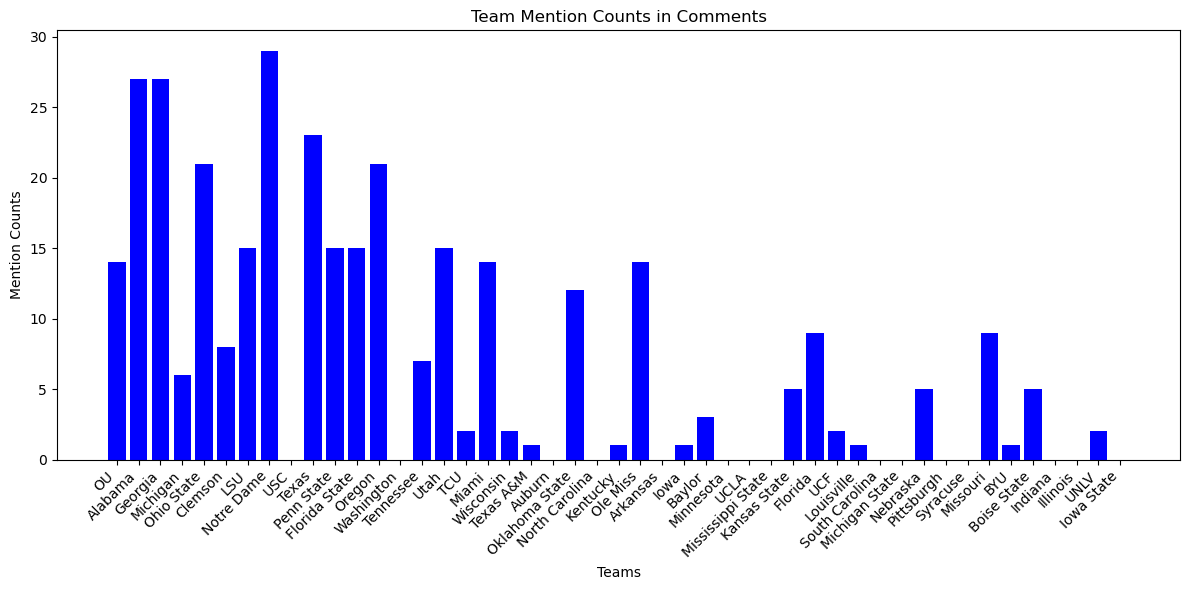

In [41]:
import matplotlib.pyplot as plt

# Prepare data for the bar graph
teams_list = list(team_mentions_dict.keys())
counts_list = list(team_mentions_dict.values())

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(teams_list, counts_list, color='blue')
plt.xlabel('Teams')
plt.ylabel('Mention Counts')
plt.title('Team Mention Counts in Comments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()


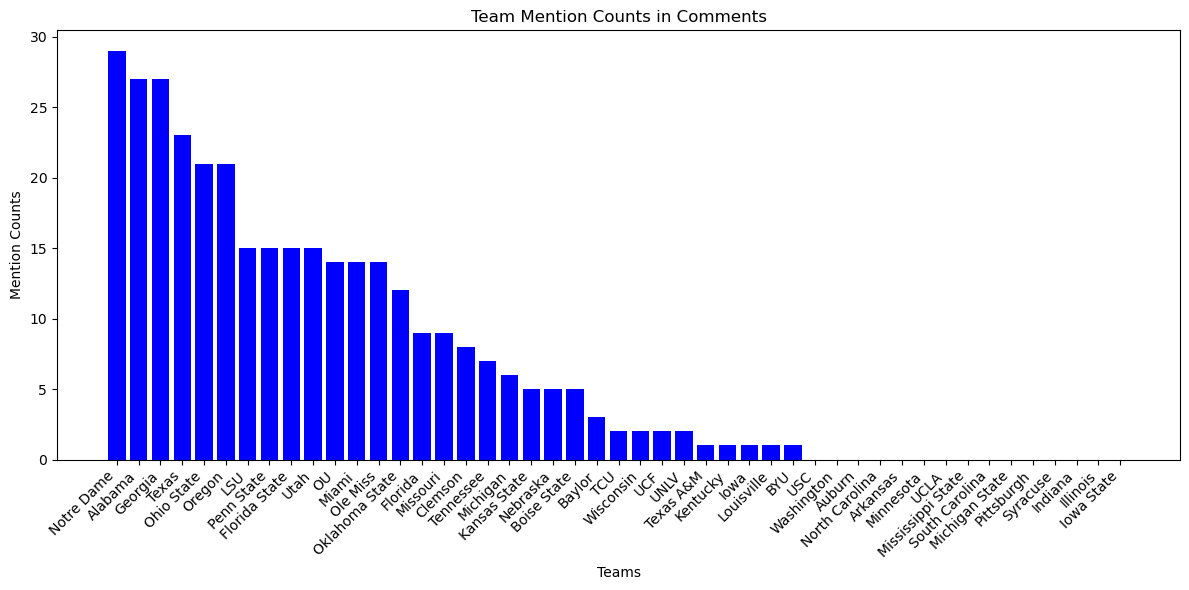

In [42]:
import matplotlib.pyplot as plt

# Sort the dictionary by counts in descending order
sorted_team_mentions = dict(sorted(team_mentions_dict.items(), key=lambda item: item[1], reverse=True))

# Prepare data for the bar graph
teams_list = list(sorted_team_mentions.keys())
counts_list = list(sorted_team_mentions.values())

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(teams_list, counts_list, color='blue')
plt.xlabel('Teams')
plt.ylabel('Mention Counts')
plt.title('Team Mention Counts in Comments')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  
plt.show()
